<a href="https://colab.research.google.com/github/arunkumarpadmaneri/HealthcareAI/blob/main/EasyOcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip3 install torch torchvision

In [4]:
! pip3 install easyocr

     |████████████████████████████████| 70.8 MB 12 kB/s 
     |████████████████████████████████| 47.6 MB 1.6 MB/s 


In [5]:
!pip3 install opencv-python

In [6]:
from easyocr import Reader
import cv2

In [7]:
ImagePath = "/content/ocrresults.png"
# load the input image from disk
image = cv2.imread("/content/drive/MyDrive/OCRDATA/mocdocinvoice.png")
# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(["en"], gpu=False)
results = reader.readtext(image)

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [8]:
results

[([[765, 0], [835, 0], [835, 15], [765, 15]], 'Tru5ys', 0.38492317751764354),
 ([[841, 0], [949, 0], [949, 15], [841, 15]], 'EMSFVILID', 0.3737313470072569),
 ([[548, 15], [948, 15], [948, 42], [548, 42]],
  'NO:17, Swamy square, 3rd cross street extension,',
  0.5600397117067124),
 ([[54, 23], [191, 23], [191, 83], [54, 83]], 'Joc) oc', 0.47320695389846446),
 ([[631, 41], [954, 41], [954, 69], [631, 69]],
  'Vijayanagar;Velachery,Chennai-600042.',
  0.5929632763147291),
 ([[698, 66], [952, 66], [952, 92], [698, 92]],
  'CIN: U72900TN2O12PTC087938',
  0.7257480214303192),
 ([[744, 92], [954, 92], [954, 116], [744, 116]],
  'GSTN: 33AAACYSZZOEIZE',
  0.6145196272286895),
 ([[806, 118], [954, 118], [954, 142], [806, 142]],
  'PAN: AAACYSTZOE',
  0.7623515185271535),
 ([[438, 184], [540, 184], [540, 214], [438, 214]],
  'Invoice',
  0.9998714951228028),
 ([[23, 217], [51, 217], [51, 237], [23, 237]], 'To', 0.9999209334277391),
 ([[580, 214], [869, 214], [869, 238], [580, 238]],
  'Invoice

[INFO] 0.3849: Tru5ys
[INFO] 0.3737: EMSFVILID
[INFO] 0.5600: NO:17, Swamy square, 3rd cross street extension,
[INFO] 0.4732: Joc) oc
[INFO] 0.5930: Vijayanagar;Velachery,Chennai-600042.
[INFO] 0.7257: CIN: U72900TN2O12PTC087938
[INFO] 0.6145: GSTN: 33AAACYSZZOEIZE
[INFO] 0.7624: PAN: AAACYSTZOE
[INFO] 0.9999: Invoice
[INFO] 0.9999: To
[INFO] 0.8606: Invoice Number: Yro-2022-04-40
[INFO] 0.9243: GeneSupport
[INFO] 0.6098: Date:  15/04/2022
[INFO] 0.9672: Baner;
[INFO] 1.0000: Pune
[INFO] 0.8088: SAC Code: 00440452
[INFO] 0.9995: GSTN Number
[INFO] 0.9856: Professional Services
[INFO] 0.7646: Amount
[INFO] 0.6826: Monthly Subscription Cost
[INFO] 0.6999: <5,500.00
[INFO] 0.9983: Sub Total:
[INFO] 0.4899: 85,500.00
[INFO] 0.8711: IGST 18%
[INFO] 0.7369: r990.00
[INFO] 0.5619: Amount (in words): RUPEES SIX THOUSAND FOUR HUNDRED AND NINETY ONLY
[INFO] 0.9999: Total:
[INFO] 0.3765: {6,490.00
[INFO] 0.9994: Notes:
[INFO] 0.8696: Please make Payments by AIC. Payee Cheque or Bank Transfer
[INF

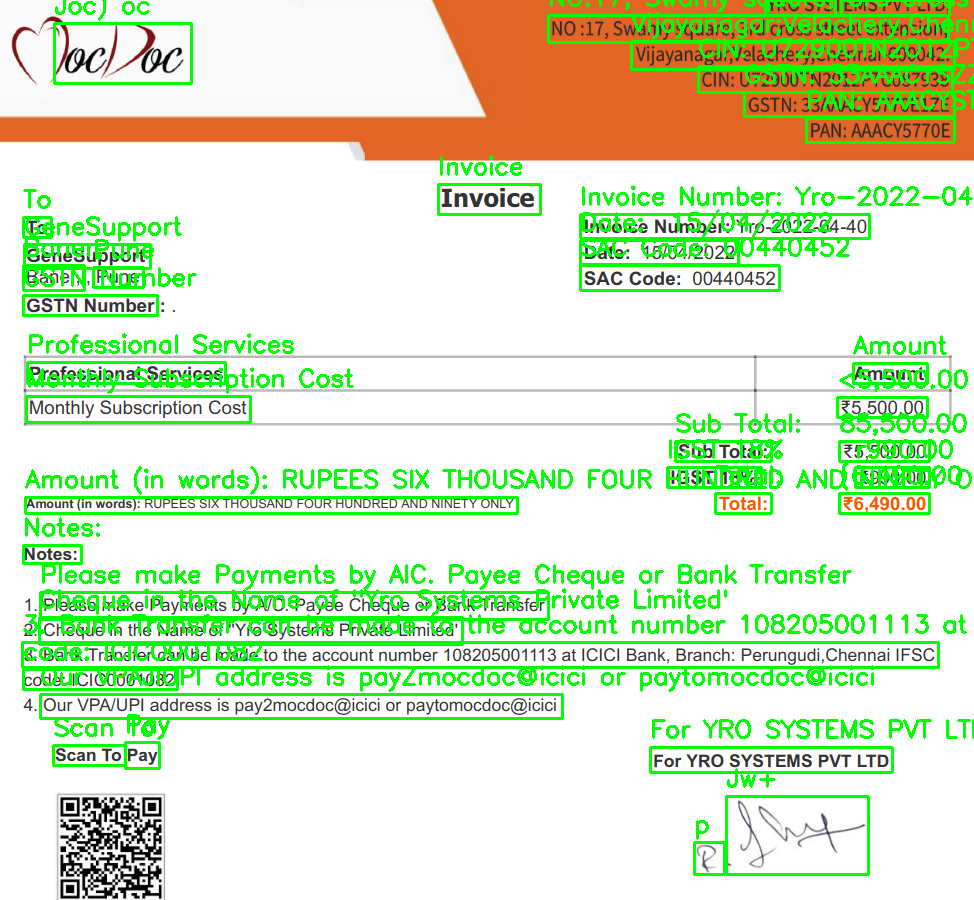

In [9]:
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))
	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))
	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = text
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
from google.colab.patches import cv2_imshow
cv2_imshow(image)
